In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'data.csv')

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

# Missing value Treatment

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
df['x1'].fillna('nan',inplace=True)

In [7]:
df=df[df['x1']!='nan']

In [8]:
df['x2'].fillna('nan',inplace=True)

In [9]:
df=df[df['x2']!='nan']

In [10]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# Outlier Treatment

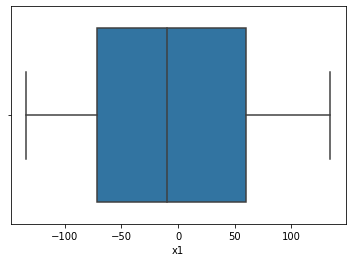

In [11]:
sns.boxplot(df['x1'])

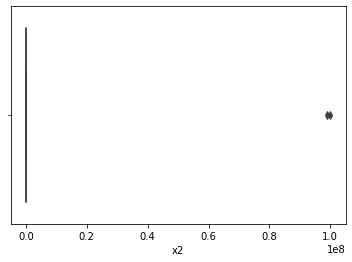

In [12]:
sns.boxplot(df['x2'])

In [13]:
q1=np.percentile(df['x2'],25)

In [14]:
q3=np.percentile(df['x2'],75)

In [15]:
IQR=q3-q1

In [16]:
IQR

144.164140905

In [17]:
higherbound=q3+(1.5*IQR)

In [18]:
df['x2']=df['x2'].apply(lambda x: higherbound if x>higherbound else x)

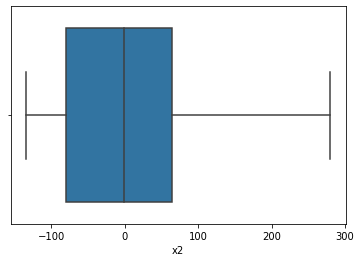

In [19]:
sns.boxplot(df['x2'])

# Visualization

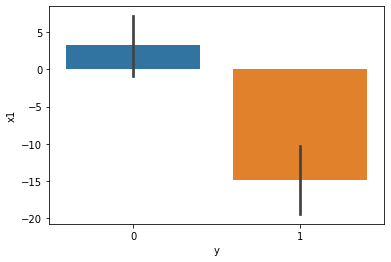

In [21]:
sns.barplot(data=df,x=df['y'],y=df['x1'])

you can see clear distinction of y based on x1 values(i.e, negative values have 1 value whereas positive values have 0 values of y)

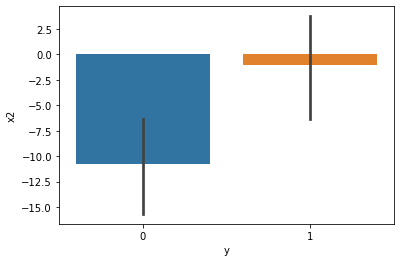

In [22]:
sns.barplot(data=df,x=df['y'],y=df['x2'])

This shows that negative values of x2 tends to 0 value of y in given dataframe.

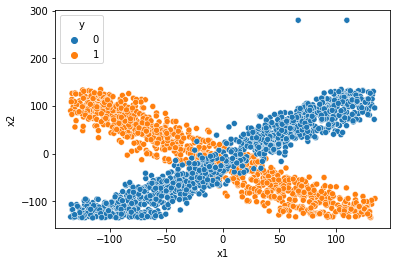

In [24]:
sns.scatterplot(data=df,x=df['x1'],y=df['x2'],hue=df['y'])

This graph shows that if there is direct proportional relationship between x1 and x2 columns then y value is 0 and if there is inverse proportional relationship between x1 and x2 then y value is 1

AND this data is linearly propotional data.But crosses or overlaps each other.

# Standardization

In [45]:
df['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df)
print(standardized_data.shape)

(2219, 3)


In [26]:
df_std = pd.DataFrame(standardized_data,columns = df.columns)

# Spliting data

In [34]:

Y =df['y']
X=df_std.drop('y',axis=1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [36]:
print(X_train.shape, y_train.shape)
print( X_train.shape, y_test.shape)

(1553, 2) (1553,)
(1553, 2) (666,)


# Hyperparameter Tuning

Logistic Regression

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [32]:
from sklearn.linear_model import LogisticRegression

In [37]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5,6,7,8,9], 'penalty':['l2','l1','l3']}]
acc = ['accuracy','precision','recall']                    
for i in acc:                   
    clf = GridSearchCV( LogisticRegression(), tuned_parameters, scoring='{}'.format(i))

    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
scoring accuracy
0.7657657657657657
Best parameters set found on train set:
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
scoring precision
0.9925373134328358
Best parameters set found on train set:
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
      

Support vector machine

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [39]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
acc = ['accuracy','precision','recall']                    
for i in acc:                   
    clf = RandomizedSearchCV( SVC(), tuned_parameters, scoring='{}'.format(i))

    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.7219924177728873, 'C': 100}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7219924177728873,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
scoring accuracy
0.948948948948949
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.09991286393643761, 'C': 1}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09991286393643761,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
scoring precision
1.0
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.18339926436539256, 'C': 1000}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1

DecisionTree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:

tuned_parameters = [{'max_depth':[1, 2, 3, 4, 5,6,7,8,9,10]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 7}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
scoring accuracy
0.9354354354354354
Best parameters set found on train set:
{'max_depth': 6}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
sc

KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1, 2, 3]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 2, 'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
scoring accuracy
0.948948948948949
Best parameters set found on train set:
{'p': 2, 'n_neighbors': 2}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
scoring precision
0.9568345323741008
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')
scoring recall
0.9409722222222222


#OBSERVATIONS:

1.If we considering about for all accuracy then SVC with {'kernel': 'rbf', 'gamma': 0.7219924177728873, 'C': 100} and KNN with {'p': 2, 'n_neighbors': 9} are good models.
                                    

2.if we talk about logistic regression it gives less accuracy, because data follows two linear relations and which are overlapping.

3.if we conserding precision then SVM with {'kernel': 'rbf', 'gamma': 0.18339926436539256, 'C': 1000} and logistic regression with {'C': 1, 'penalty': 'l2'} are better models.

4.if we considering recall then SVM with {'kernel': 'rbf', 'gamma': 0.18339926436539256, 'C': 1000} and Decision Tree with {'max_depth': 2} are best models.